## Ames Housing Data exploration

### This is to explore the dataset

In [1]:
# setup packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in file:
data = pd.read_excel('AmesHousing.xls','Sheet1')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# know the features:
print(data.columns)
print("excluding Order and PID....")
order = data.pop('Order')
PID = data.pop('PID')
print("total number of features (including Sale price):",len(data.columns))

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [25]:
# Take a peak of the Sale price distribution
price = data['SalePrice']
print(data['SalePrice'].describe())

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [26]:
pricenp=np.array(price)
# save this for calculation of the diff_price later on
np.save('Sale_Price.npy',pricenp)

In [8]:
print(len(pricenp))

2930


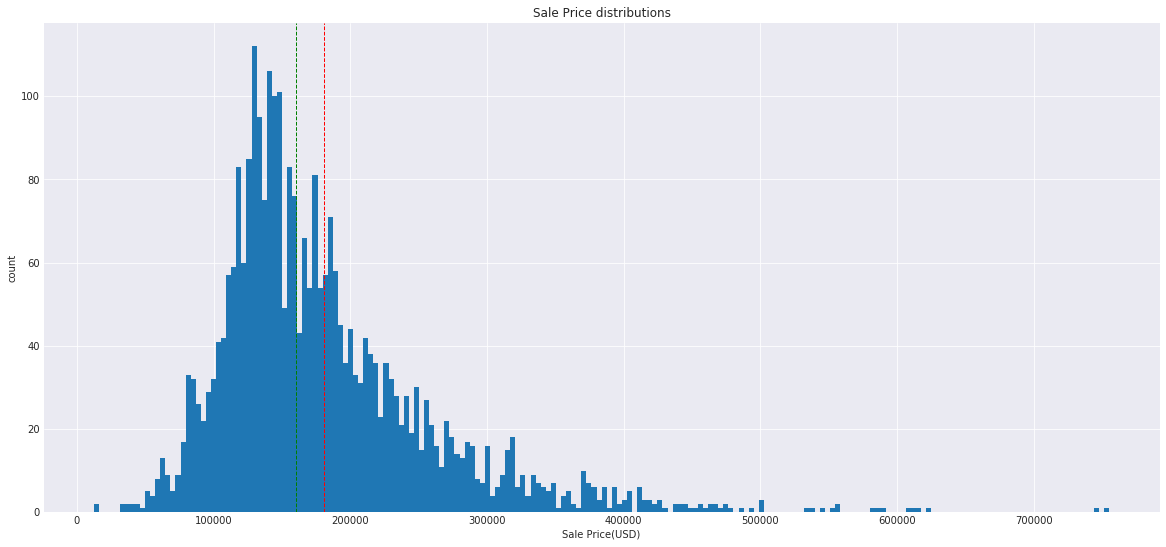

In [179]:
plt.figure(figsize=(20,9))
plt.hist(price, 200)
plt.axvline(data['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(data['SalePrice'].median(), color='g', linestyle='dashed', linewidth=1)
plt.xlabel('Sale Price(USD)')
plt.ylabel('count')
plt.title('Sale Price distributions')
plt.grid(True)

In [4]:
import seaborn as sns

In [181]:
#Ames = sns.load_dataset(data)
#sns.pairplot(Ames)               ******************Does not work at this point , for some reasonsT_T

In [5]:
# looking into all 80 attributes
nu_cols = data._get_numeric_data().columns
print(nu_cols)
data[nu_cols].describe()


Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
cat_cols = list(set(data.columns) - set(nu_cols))
print(cat_cols)
for line in cat_cols:
    print(data[line].unique())
    print(data[line].value_counts())

['Exterior 1st', 'Foundation', 'Lot Config', 'Roof Matl', 'Bldg Type', 'Sale Condition', 'Sale Type', 'Garage Finish', 'Land Slope', 'Bsmt Exposure', 'Mas Vnr Type', 'Street', 'Neighborhood', 'House Style', 'Garage Type', 'Roof Style', 'Paved Drive', 'Exter Qual', 'Central Air', 'Fireplace Qu', 'Utilities', 'Functional', 'Alley', 'Bsmt Cond', 'Heating QC', 'Condition 2', 'Land Contour', 'Fence', 'Pool QC', 'Exter Cond', 'Garage Cond', 'MS Zoning', 'Misc Feature', 'BsmtFin Type 1', 'Lot Shape', 'Exterior 2nd', 'Condition 1', 'Garage Qual', 'Heating', 'Kitchen Qual', 'BsmtFin Type 2', 'Bsmt Qual', 'Electrical']
['BrkFace' 'VinylSd' 'Wd Sdng' 'CemntBd' 'HdBoard' 'Plywood' 'MetalSd'
 'AsbShng' 'WdShing' 'Stucco' 'AsphShn' 'BrkComm' 'CBlock' 'PreCast'
 'Stone' 'ImStucc']
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     126
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2

In [7]:
# view how many columns contains Nan values
dstat= data.isnull().sum()
contNan=dstat[dstat!=0]
Nan_cols = contNan.index
print(Nan_cols)

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')


In [8]:
# deal with the attributes that Nan =0 (numerical)
cond_nu_cols=['Lot Frontage','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']
for item in cond_nu_cols:
    data=data.fillna({item:0})
    
data.isnull().sum()

MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area         0
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          0
Garage Area          0
Garage Qual

In [9]:
data['Garage Yr Blt'].describe()

count    2771.000000
mean     1978.132443
std        25.528411
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

In [79]:
# deal with the attributes that Nan =0 (categorical)
k=data.isnull().sum()
print(k[k!=0])

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [80]:
data=data.fillna({'Electrical':'No'})
data=data.fillna({'Garage Yr Blt':1895})

In [81]:
k=data.isnull().sum()
Nan_cols = k.index

In [82]:
for item in Nan_cols:
    data=data.fillna({item:'None'})
data.isnull().sum()    

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
                 ..
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0
3Ssn Porch        0
Screen Porch      0


## Sequentially plot down the features and trying to find out their relationships

['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'SalePrice']


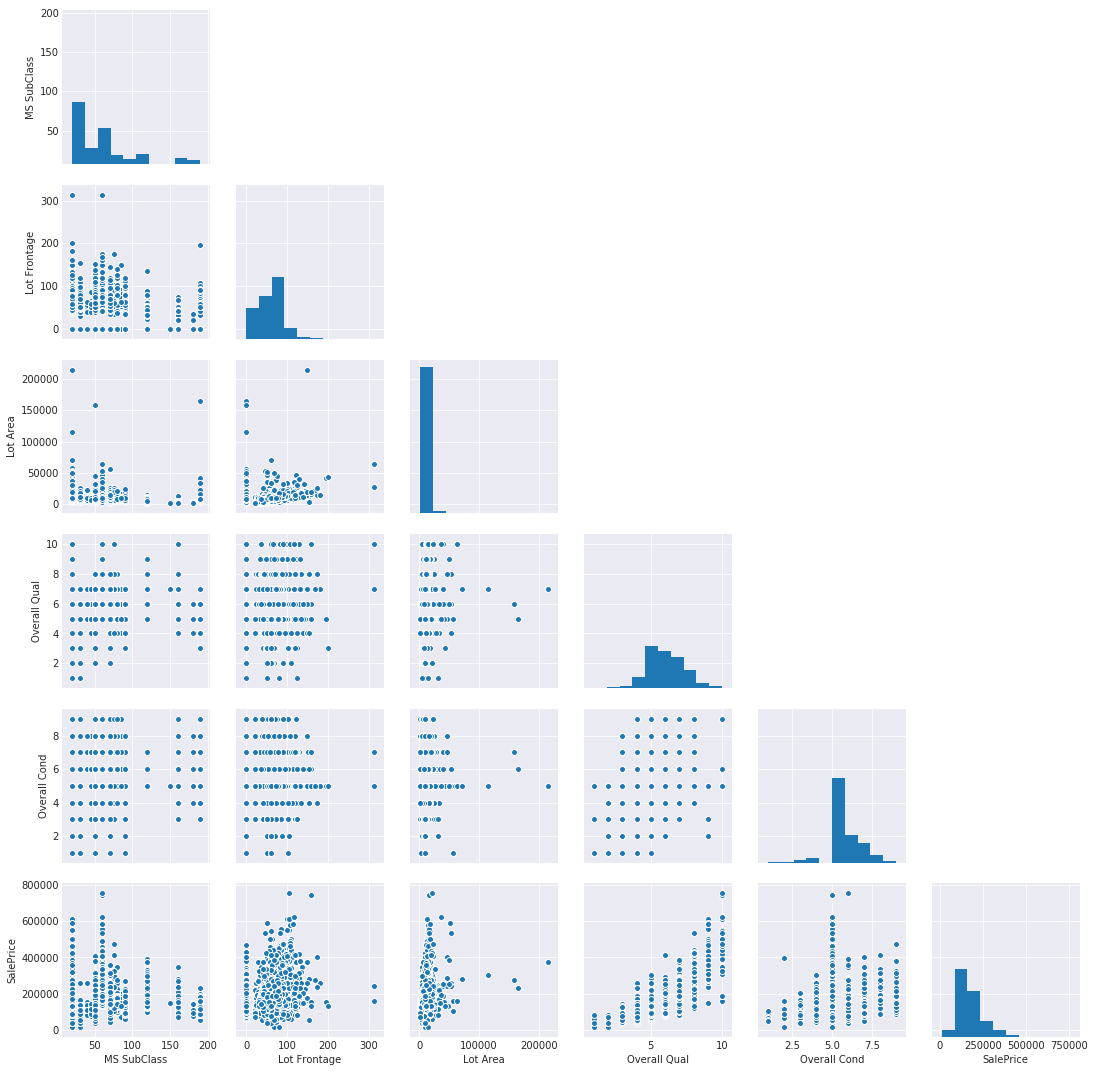

In [88]:
nu1_cols=list(nu_cols[0:5])+list([nu_cols[36]])
print(nu1_cols)
sns.set_style("darkgrid")
g=sns.pairplot(data[nu1_cols])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

['Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'SalePrice']


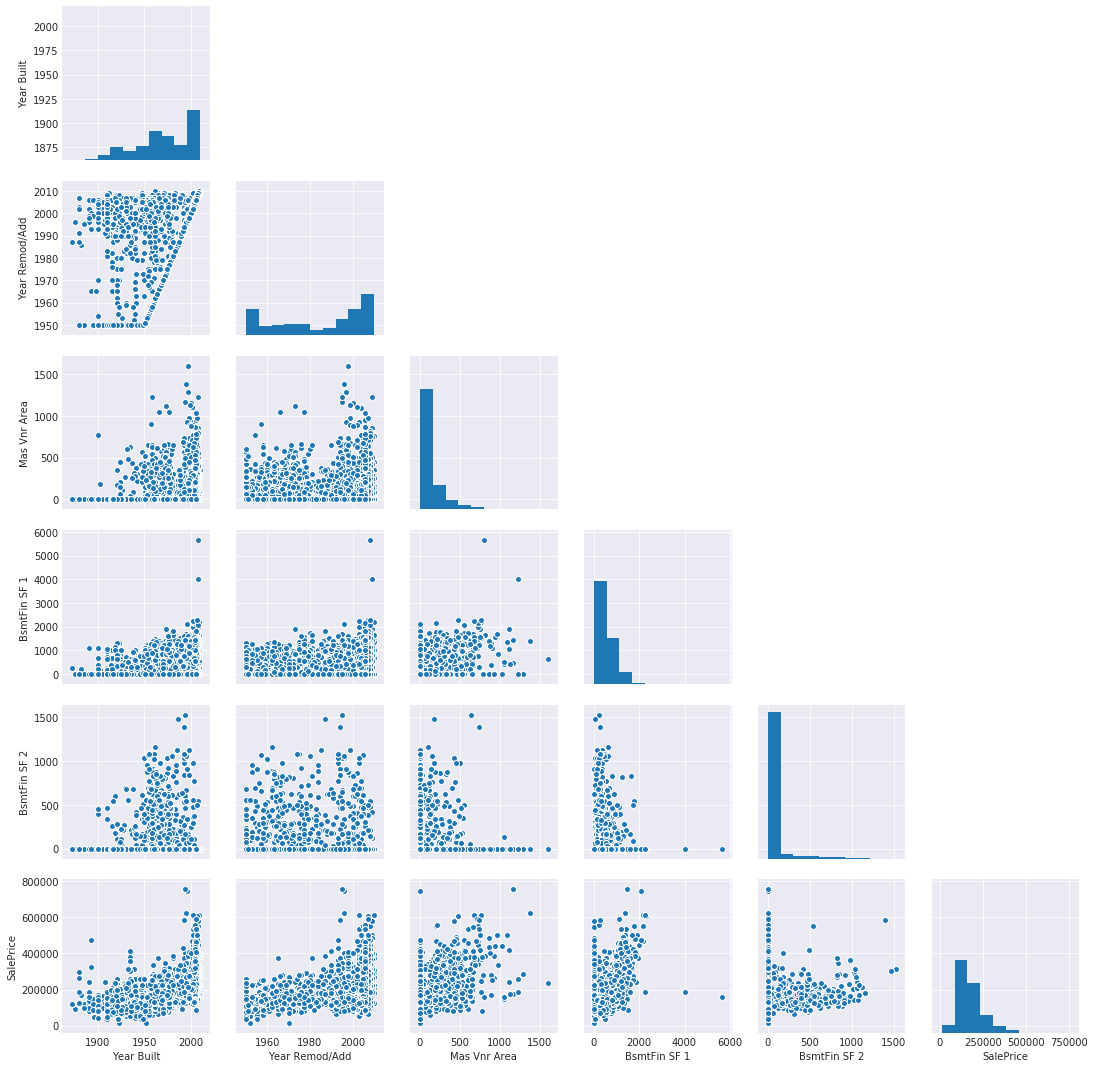

In [89]:
nu2_cols=list(nu_cols[5:10])+list([nu_cols[36]])
print(nu2_cols)
sns.set_style("darkgrid")
g=sns.pairplot(data[nu2_cols])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

['Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'SalePrice']


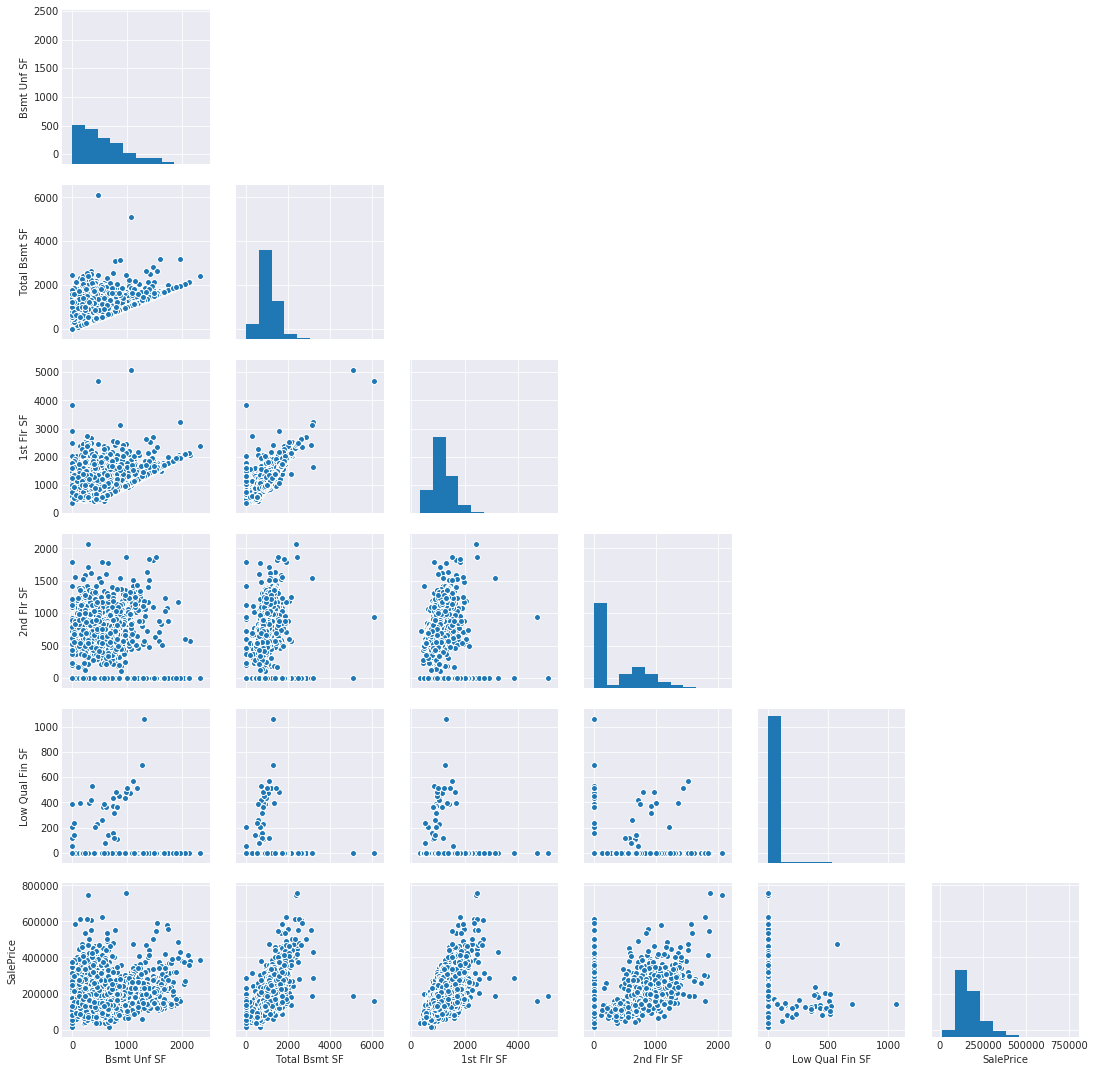

In [90]:
nu3_cols=list(nu_cols[10:15])+list([nu_cols[36]])
print(nu3_cols)
sns.set_style("darkgrid")
g=sns.pairplot(data[nu3_cols])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

['Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'SalePrice']


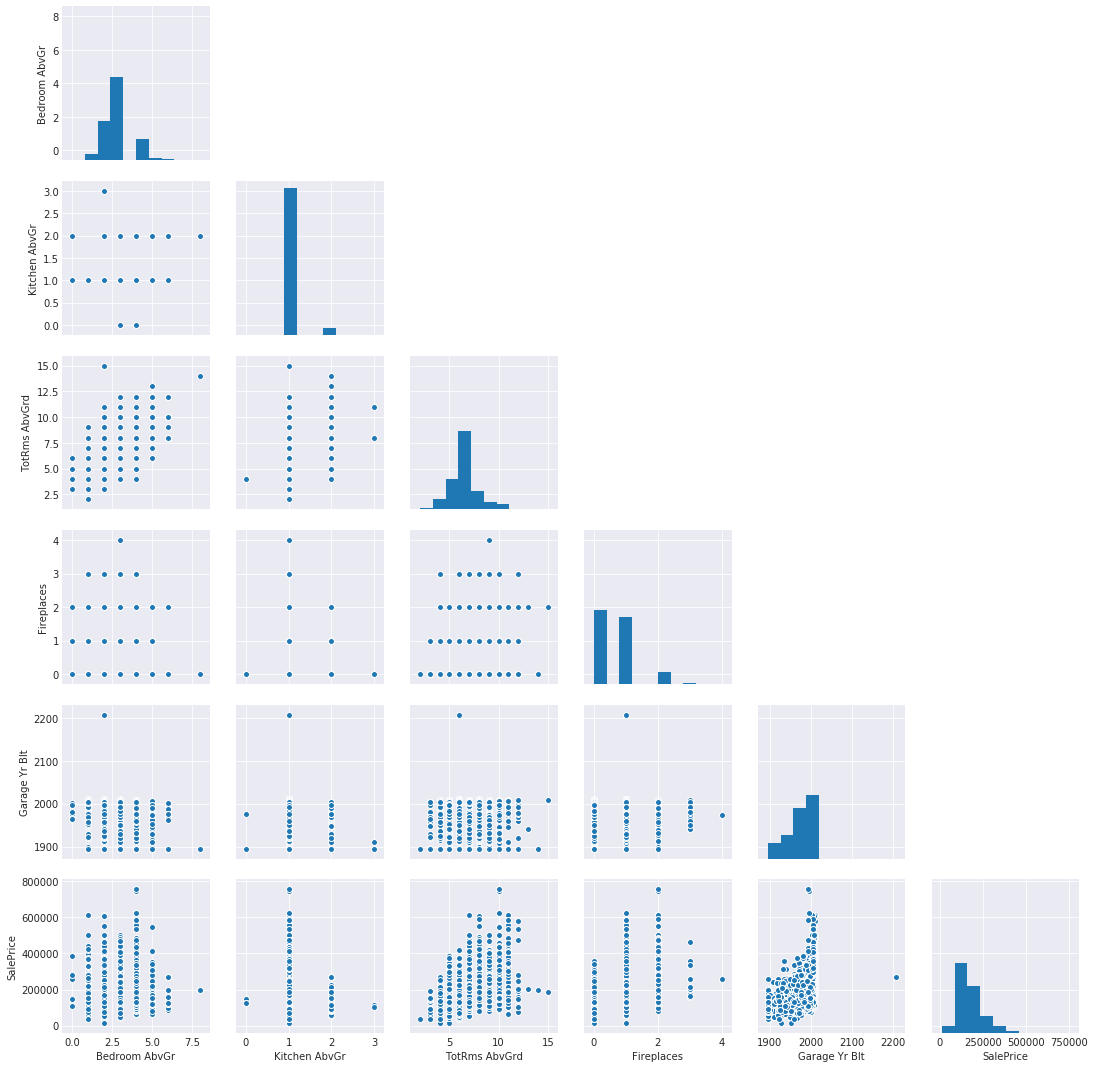

In [92]:
nu5_cols=list(nu_cols[20:25])+list([nu_cols[36]])
print(nu5_cols)
sns.set_style("darkgrid")
g=sns.pairplot(data[nu5_cols])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

In [13]:
#Find strange outlier Garage Yr Built
data.loc[data['Garage Yr Blt'] > 2100, 'Garage Yr Blt'] = 2010

In [137]:
data['Garage Yr Blt'].describe() # now outlier fixed

count    2930.000000
mean     1973.553925
std        30.870339
min      1895.000000
25%      1957.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

['Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'SalePrice']


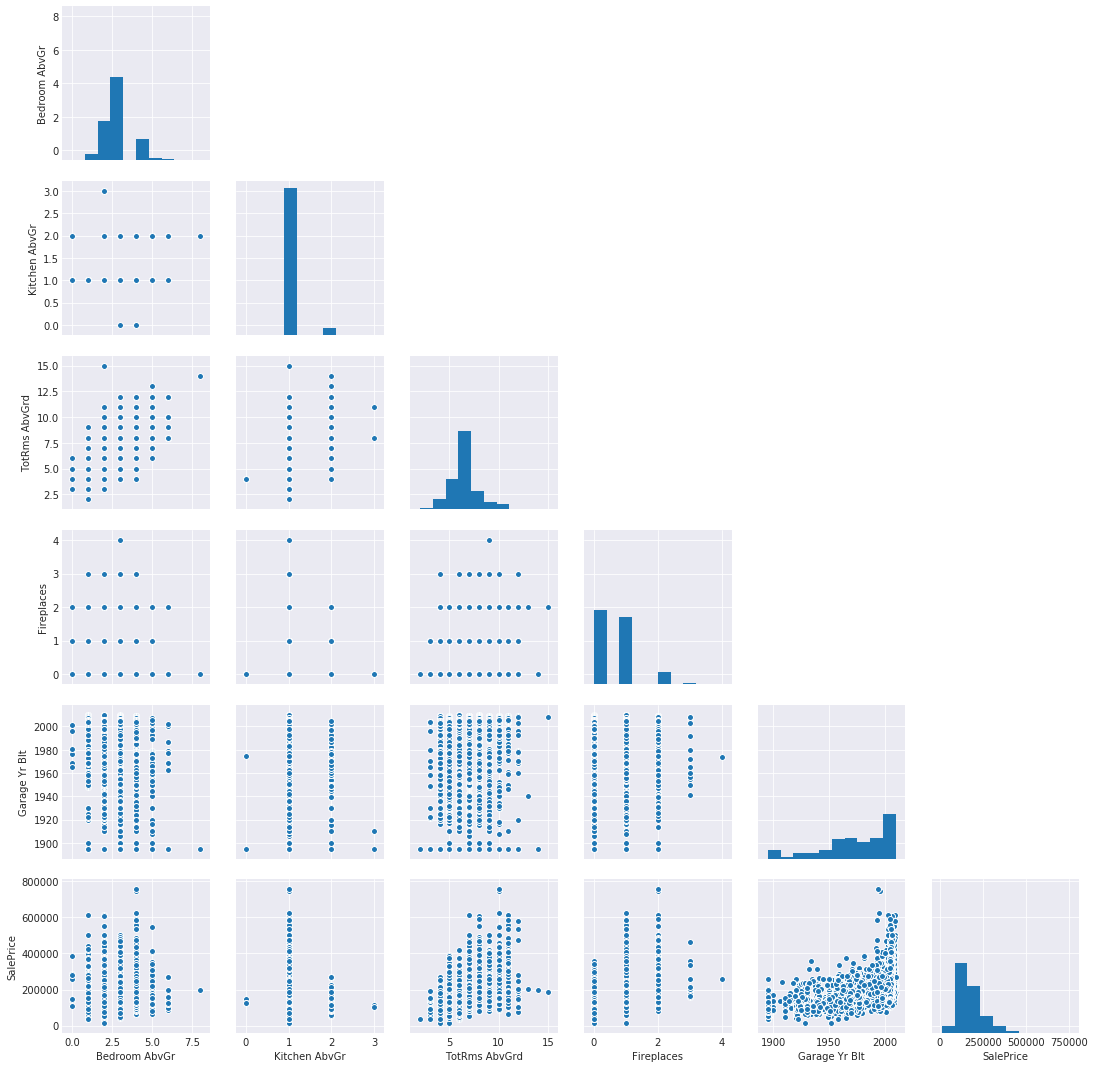

In [112]:
nu5_cols=list(nu_cols[20:25])+list([nu_cols[36]])
sns.set_style("darkgrid")
g=sns.pairplot(data[nu5_cols])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

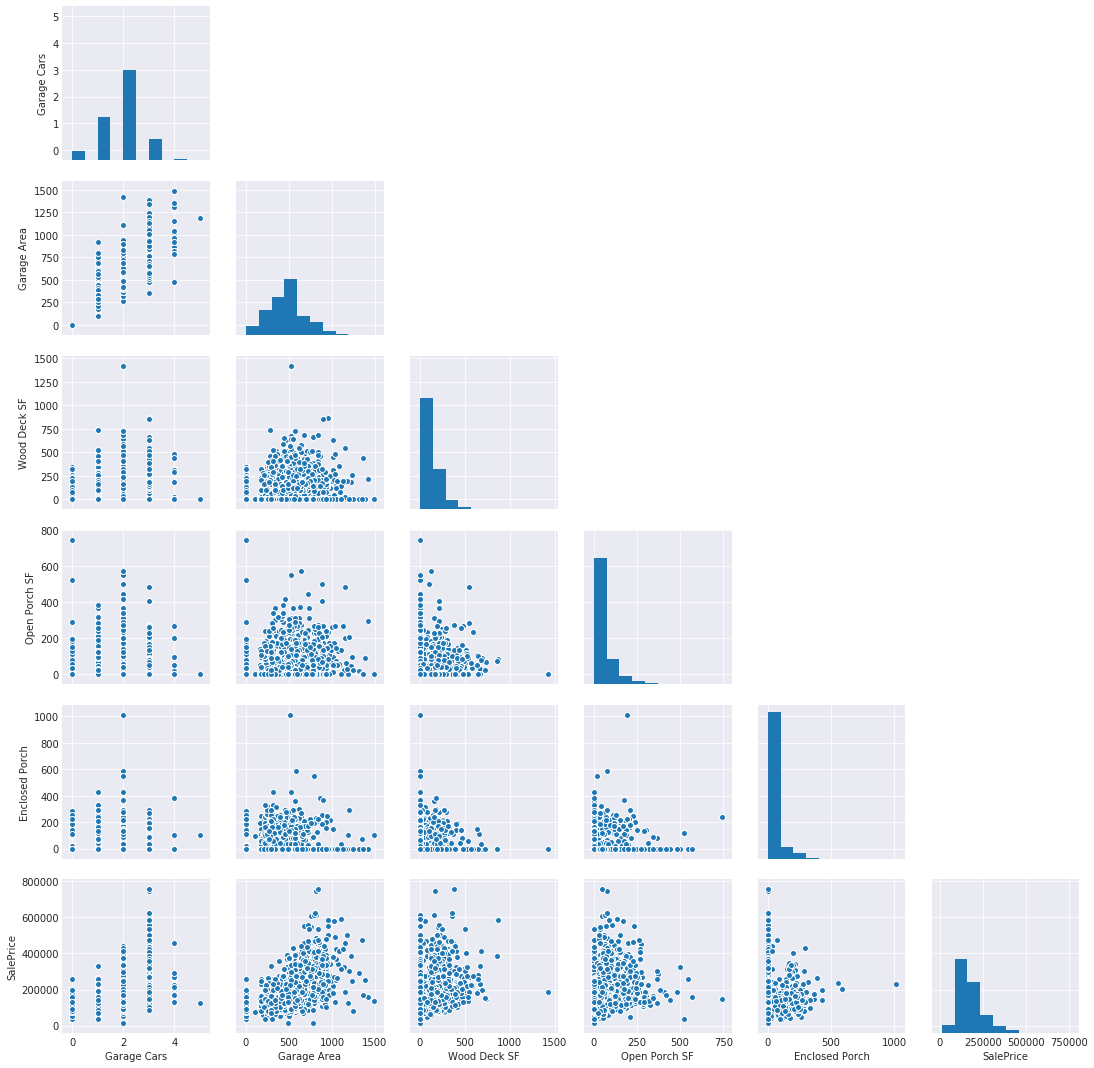

In [113]:
nu6_cols=list(nu_cols[25:30])+list([nu_cols[36]])
sns.set_style("darkgrid")
g=sns.pairplot(data[nu6_cols])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

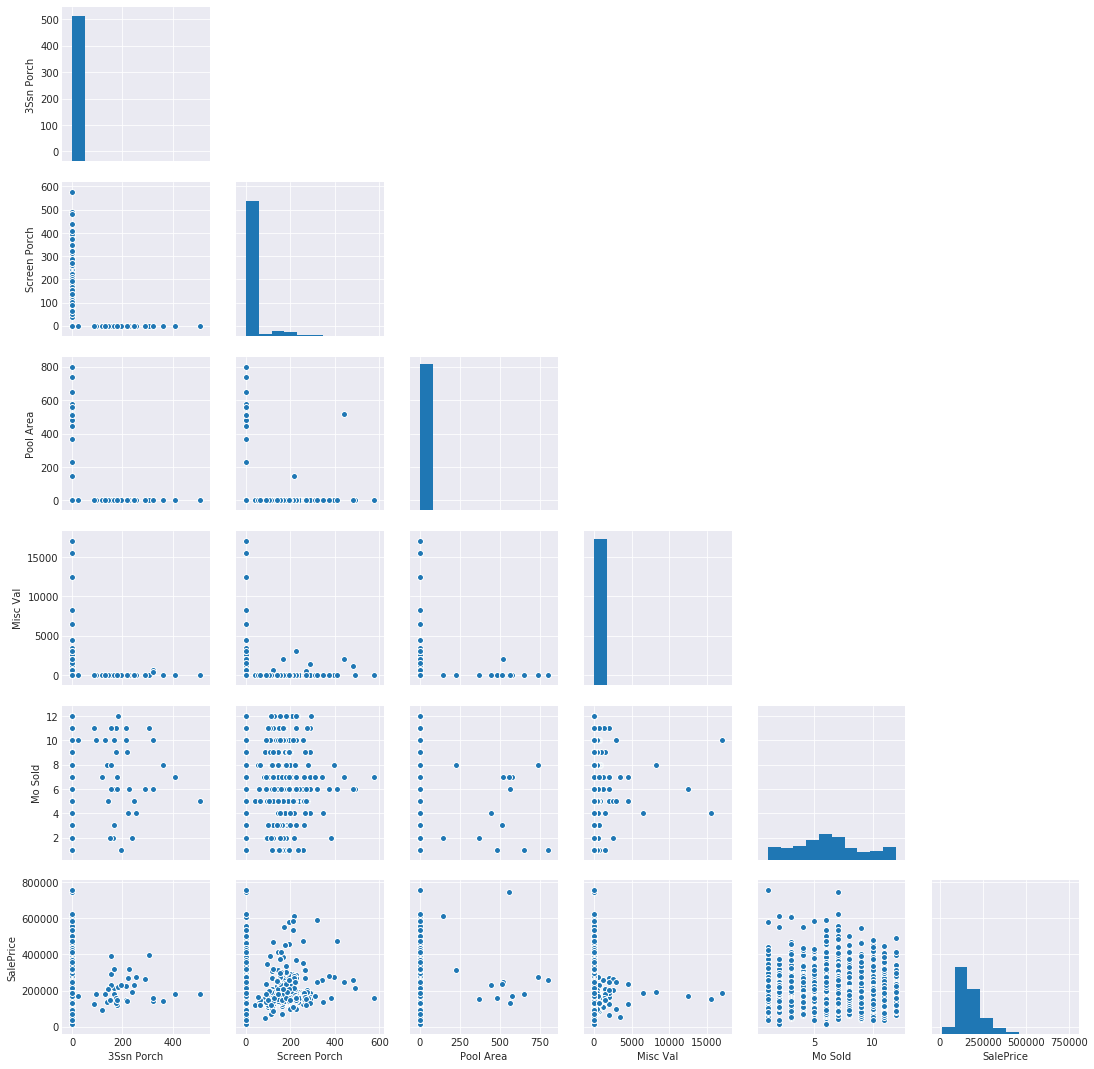

In [114]:
nu7_cols=list(nu_cols[30:35])+list([nu_cols[36]])
sns.set_style("darkgrid")
g=sns.pairplot(data[nu7_cols])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

In [192]:
# Start encoding the catagorical attributes:
print(cat_cols)
# manual mapping some obvious ranking attributes:
rank_cols=['Exter Cond','Pool QC','Kitchen Qual','Garage Qual','Bsmt Cond','Heating QC','Fireplace Qu','Garage Cond','Exter Qual']
print(data[rank_cols].isnull().sum())
for item in rank_cols:
    print(data[item].value_counts())

['Exter Cond', 'Pool QC', 'Neighborhood', 'Kitchen Qual', 'Sale Condition', 'Exterior 2nd', 'Garage Qual', 'Bsmt Cond', 'Foundation', 'Condition 2', 'Land Slope', 'Condition 1', 'Bsmt Qual', 'Paved Drive', 'Bldg Type', 'BsmtFin Type 1', 'Heating QC', 'Garage Type', 'Fireplace Qu', 'Functional', 'Garage Cond', 'Exter Qual', 'Fence', 'Misc Feature', 'Land Contour', 'Street', 'Roof Matl', 'Mas Vnr Type', 'Utilities', 'Lot Shape', 'Roof Style', 'Electrical', 'Bsmt Exposure', 'Sale Type', 'MS Zoning', 'Central Air', 'Garage Finish', 'Heating', 'Lot Config', 'BsmtFin Type 2', 'Alley', 'Exterior 1st', 'House Style']
Exter Cond      0
Pool QC         0
Kitchen Qual    0
Garage Qual     0
Bsmt Cond       0
Heating QC      0
Fireplace Qu    0
Garage Cond     0
Exter Qual      0
dtype: int64
TA    2549
Gd     299
Fa      67
Ex      12
Po       3
Name: Exter Cond, dtype: int64
None    2917
Gd         4
Ex         4
TA         3
Fa         2
Name: Pool QC, dtype: int64
TA    1494
Gd    1160
Ex     

In [89]:
# mapping the ranking features:
mapdict= {"Ex": 5, "Gd": 4,"TA":3, "Fa": 2, "Po":1, "None":-1}
### Question would be, would the negative encoding of the "None" affect the ranking? Or would it be just some number idicating an outlier?
def map_rank(pddata,cols,mapdict):
    for item in cols:
        map_num={item:mapdict}
        data.replace(map_num,inplace=True)
    return data


In [15]:
# Encode ranking features:
map_rank(data,rank_cols,mapdict)

NameError: name 'rank_cols' is not defined

In [141]:
data[rank_cols].head()

,Exter Cond,Pool QC,Kitchen Qual,Garage Qual,Bsmt Cond,Heating QC,Fireplace Qu,Garage Cond,Exter Qual
0,3,-1,3,3,4,2,4,3,3
1,3,-1,3,3,3,3,-1,3,3
2,3,-1,4,3,3,3,-1,3,3
3,3,-1,5,3,3,5,3,3,4
4,3,-1,3,3,3,4,3,3,3


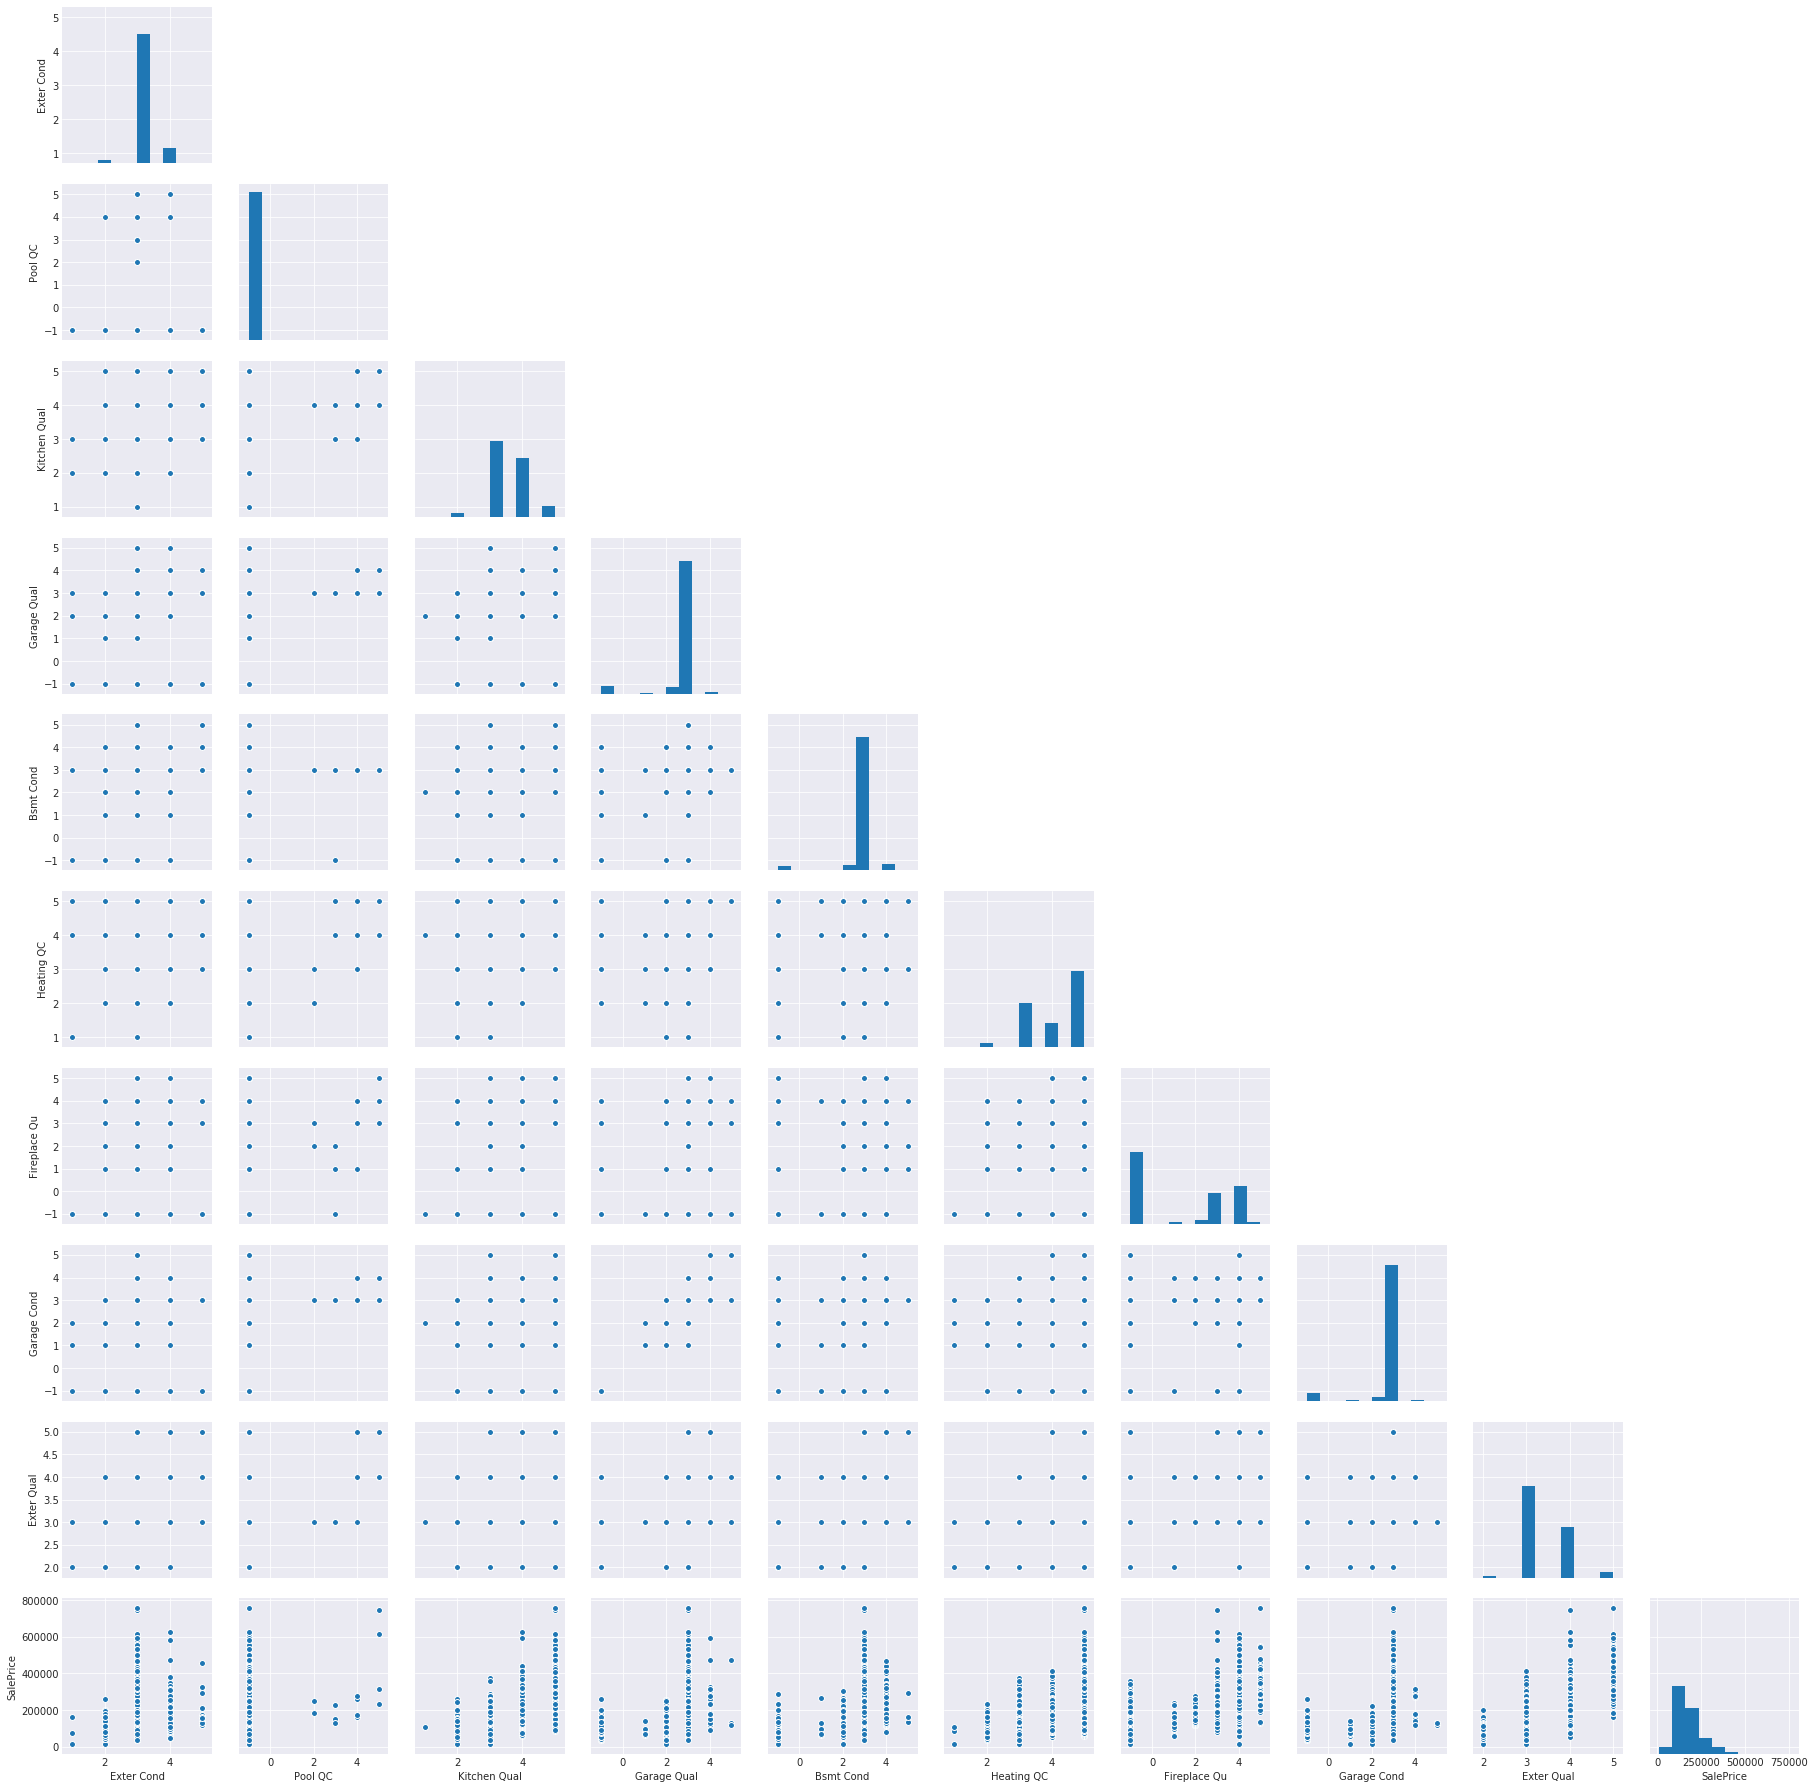

In [143]:
#plot those encoded columns against SalePrie
nu8_cols=list(rank_cols)+list([nu_cols[36]])
sns.set_style("darkgrid")
g=sns.pairplot(data[nu8_cols])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

In [16]:
a=data.dtypes
print(type(a))
print(a.loc[a!='int64'])

<class 'pandas.core.series.Series'>
MS Zoning          object
Lot Frontage      float64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Heating            object
Heating QC         object
Central Air        object
Electrical         object
Bsmt Full Bath    float64
Bs

In [19]:
# Tweeking some attributes that can be combined
data['Garage Yr Blt']=data['Garage Yr Blt'].astype(int)
data['Garage Cars']=data['Garage Cars'].astype(int)
data['Bsmt Half Bath']=data['Bsmt Half Bath']*0.5
data['Bsmt Bath']=data['Bsmt Full Bath']+data['Bsmt Half Bath']

In [18]:
data['Bsmt Half Bath'].value_counts()
# pop out the features that is covered
data.drop(['Bsmt Half Bath', 'Bsmt Full Bath'], axis=1)

0.0    2755
0.5     171
1.0       4
Name: Bsmt Half Bath, dtype: int64

In [85]:
# work on the columns that can be one-hot encoded
htencd_cols = ['Garage Type','Alley','Exterior 1st','Foundation','Lot Config','Roof Matl','Roof Style','Bldg Type','Mas Vnr Type','Lot Config','Neighborhood','Heating','Functional','Condition 1','Condition 2','Land Contour','Fence','Lot Shape','Exterior 2nd']
rankother_cols=['Lot Shape','Utilities','Land Slope','Central Air','BsmtFin Type 1','BsmtFinType 2','MS Zoning','Street','Paved Drive','Central Air','Utilities','BsmtFin Type 1','BsmtFin Type 2','House Style','Misc Feature']

In [86]:
# define labeling conversion to numbers
def LEncode(datain,feat2bencod):
    """ This function works to encode catagorical feature contents into numerical. The input the all dataset (datain), and the columns to be encoded (feat2bencod),"""
    """ column need to be a list with strings of the names of the features."""
    """ all input columns should be prepared that no null values"""
    from sklearn.preprocessing import LabelEncoder
    num = len(feat2bencod)
    for i in range(0,num):
        f_name1 = feat2bencod[i-1]
        print(f_name1)
        lb_ft = LabelEncoder()
        datain[f_name1]=lb_ft.fit_transform(datain[f_name1])
        mapping = dict(zip(lb_ft.classes_, range(len(lb_ft.classes_))))
        print(mapping)
    return datain

In [87]:
LEncode(data,htencd_cols)

Exterior 2nd
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}
Garage Type
{'2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5, 'None': 6}
Alley
{'Grvl': 0, 'None': 1, 'Pave': 2}
Exterior 1st
{'AsbShng': 0, 'AsphShn': 1, 'BrkComm': 2, 'BrkFace': 3, 'CBlock': 4, 'CemntBd': 5, 'HdBoard': 6, 'ImStucc': 7, 'MetalSd': 8, 'Plywood': 9, 'PreCast': 10, 'Stone': 11, 'Stucco': 12, 'VinylSd': 13, 'Wd Sdng': 14, 'WdShing': 15}
Foundation
{'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5}
Lot Config
{'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
Roof Matl
{'ClyTile': 0, 'CompShg': 1, 'Membran': 2, 'Metal': 3, 'Roll': 4, 'Tar&Grv': 5, 'WdShake': 6, 'WdShngl': 7}
Roof Style
{'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5}
Bldg Type
{'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}
Mas Vnr Type
{'BrkCmn': 0, 'BrkFace': 1, 'CBlock': 2, 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Total House SF
0,20,RL,141,31770,Pave,1,0,3,AllPub,0,...,None,4,None,0,5,2010,WD,Normal,215000,3449.0
1,20,RH,80,11622,Pave,1,3,3,AllPub,4,...,None,2,None,0,6,2010,WD,Normal,105000,2188.0
2,20,RL,81,14267,Pave,1,0,3,AllPub,0,...,None,4,Gar2,12500,6,2010,WD,Normal,172000,3493.0
3,20,RL,93,11160,Pave,1,3,3,AllPub,0,...,None,4,None,0,4,2010,WD,Normal,244000,5265.0
4,60,RL,74,13830,Pave,1,0,3,AllPub,4,...,None,2,None,0,3,2010,WD,Normal,189900,2940.0
5,60,RL,78,9978,Pave,1,0,3,AllPub,4,...,None,4,None,0,6,2010,WD,Normal,195500,3250.0
6,120,RL,41,4920,Pave,1,3,3,AllPub,4,...,None,4,None,0,4,2010,WD,Normal,213500,3398.0
7,120,RL,43,5005,Pave,1,0,1,AllPub,4,...,None,4,None,0,1,2010,WD,Normal,191500,3659.0
8,120,RL,39,5389,Pave,1,0,3,AllPub,4,...,None,4,None,0,3,2010,WD,Normal,236500,4015.0
9,60,RL,60,7500,Pave,1,3,3,AllPub,4,...,None,4,None,0,6,2010,WD,Normal,189000,3992.0


In [ ]:
# dealing with some manual mappings:
map1_HouseSty= {"1Story": 1, "2Story": 2,"1.5Fin":1.7, "1.5Unf": 1.5, "2.5Fin":2.7, "2.5Unf":2.5, "SFolyer": 1, "SLvl": 1} # for House Style
map2_CA= {"N": 0, "Y": 1} # for Central Air
map3_Ut= {""}  # for Utilites


In [50]:
sqft_cols=[item for item in list(data.columns) if item[len(item)-2:len(item)]=='SF' ] ## find all columns with squre footage 
print(sqft_cols)
# create new house square footage
data['Total House SF']=data[sqft_cols].sum(axis =1)# sum over all Square footage and get the total

['Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Wood Deck SF', 'Open Porch SF', 'Total House SF']


In [63]:
# Make all room squre footage a percentage to total square footage
del sqft_cols[-1]
for i in range(len(sqft_cols)):
    data[sqft_cols[i]]=data[sqft_cols[i]]/data['Total House SF']

In [92]:
data.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [93]:
data['Enclosed Porch'].value_counts()

0       2471
112       22
96        13
144       11
192       10
120        9
168        9
84         8
40         8
116        8
160        7
150        7
128        7
180        7
216        6
100        6
60         6
164        5
80         5
70         5
156        5
240        5
56         5
148        5
176        5
126        5
140        5
36         5
64         4
252        4
        ... 
260        1
256        1
254        1
301        1
290        1
230        1
226        1
220        1
214        1
210        1
204        1
288        1
294        1
37         1
432        1
25         1
23         1
19         1
1012       1
584        1
552        1
386        1
296        1
368        1
364        1
334        1
330        1
324        1
318        1
238        1
Name: Enclosed Porch, Length: 183, dtype: int64

In [90]:
data[sqft_cols].head()

,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Wood Deck SF,Open Porch SF
0,0.127863,0.313134,0.480139,0.000000,0.0,0.060887,0.017976
1,0.1234,0.403108,0.409506,0.000000,0.0,0.063985,0.000000
2,0.116232,0.380475,0.380475,0.000000,0.0,0.112511,0.010306
3,0.198481,0.40076,0.400760,0.000000,0.0,0.000000,0.000000
4,0.0465986,0.315646,0.315646,0.238435,0.0,0.072109,0.011565


In [39]:
htencd_cols=(data.dtypes).loc[(data.dtypes!='int64') & (data.dtypes!='float64')].index.values

In [91]:
data[htencd_cols].head()

,Garage Type,Alley,Exterior 1st,Foundation,Lot Config,Roof Matl,Roof Style,Bldg Type,Mas Vnr Type,Lot Config,Neighborhood,Heating,Functional,Condition 1,Condition 2,Land Contour,Fence,Lot Shape,Exterior 2nd
0,1,1,3,1,0,1,3,0,4,0,15,1,7,2,2,3,4,0,10
1,1,1,13,1,4,1,1,0,3,4,15,1,7,1,2,3,2,3,14
2,1,1,14,1,0,1,3,0,1,0,15,1,7,2,2,3,4,0,15
3,1,1,3,1,0,1,3,0,3,0,15,1,7,2,2,3,4,3,3
4,1,1,13,2,4,1,1,0,3,4,8,1,7,2,2,3,2,0,14


In [33]:
# do a function calculating the price difference
def diff_cal2(a):
    import numpy as np
    import time
    start_time = time.time()
    dim = len(a)
    diff_mat = np.zeros((dim, dim))
    for i in range(dim):
         diff_mat[i] = np.subtract(a[i], a)
    print("--- %s seconds ---" % (time.time() - start_time))
    return diff_mat